 # Code Assessment

Data Science team is building a data science platform which provides framework for end-to-end implementation of machine learning pipelines. The framework will be built using python in an object oriented programming style. Furthermore, we want to implement everything using the scikit learn API, all implementations confined to fit, transform, and predict methods. This will allow us to implement machine learning pipelines using the scikit learn pipelines. As such, the assessment will evaluate candidates’ ability to transform codebase prepared in procedural programming to object oriented programming, specifically using the scikit learn API as much as possible.

The following two cells contain a procedural implementation of feature engineering. In the subsequent cells it is your task to refactor the procedural implementation into an object oriented framework

More information about the scikit learn API can be found:

- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://scikit-learn.org/dev/developers/contributing.html#rolling-your-own-estimator
- http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

*If we are not able to run or replicate your code/steps, we will not grade your assessment.*

In [ ]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn import preprocessing

data = pd.read_csv('fraud_final_dataset.csv')

In [ ]:
data.head()

,user_id,signup_time,purchase_time,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


## EDA
A big portion of being a data scientist is his or her ability to understand the data. Please feel free to use the bottom cells to perform exploratory data analysis. Once you're done, please move on to the problems and tasks.

In [ ]:
# Size of the dataset.
data.shape

(120000, 13)

In [ ]:
# Check for nulls.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120000 non-null  int64  
 1   signup_time     120000 non-null  object 
 2   purchase_time   120000 non-null  object 
 3   elapsed_time    120000 non-null  int64  
 4   purchase_value  120000 non-null  int64  
 5   device_id       120000 non-null  object 
 6   source          120000 non-null  object 
 7   browser         120000 non-null  object 
 8   sex             120000 non-null  object 
 9   age             120000 non-null  int64  
 10  ip_address      120000 non-null  float64
 11  class           120000 non-null  int64  
 12  country         120000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 11.9+ MB


In [ ]:
# Descriptive Statistics.
data.describe(include='all')

,user_id,signup_time,purchase_time,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
count,120000.000000,120000,120000,120000.000000,120000.000000,120000,120000,120000,120000,120000.000000,1.200000e+05,120000.000000,120000
unique,NaN,109111,100058,NaN,NaN,110599,3,5,2,NaN,NaN,NaN,177
top,NaN,1/6/2015 12:10,1/6/2015 12:53,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,21,20,NaN,NaN,19,48297,48652,70126,NaN,NaN,NaN,46184
mean,200320.280100,NaN,NaN,1.860408,36.881475,NaN,NaN,NaN,NaN,33.125250,2.151550e+09,0.093875,NaN
std,115361.945935,NaN,NaN,1.250767,18.325855,NaN,NaN,NaN,NaN,8.617081,1.248314e+09,0.291656,NaN
min,2.000000,NaN,NaN,0.000000,9.000000,NaN,NaN,NaN,NaN,18.000000,9.344714e+04,0.000000,NaN
25%,100925.500000,NaN,NaN,1.000000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085345e+09,0.000000,NaN
50%,200037.500000,NaN,NaN,2.000000,34.000000,NaN,NaN,NaN,NaN,33.000000,2.155238e+09,0.000000,NaN
75%,300395.500000,NaN,NaN,3.000000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.241268e+09,0.000000,NaN


0    0.906125
1    0.093875
Name: class, dtype: float64


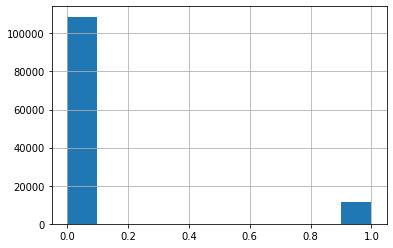

In [ ]:
# Only 9.3% of the data, labeled as fraud. ( Highly imbalance data)
print(data["class"].value_counts(normalize=True))

data["class"].hist();

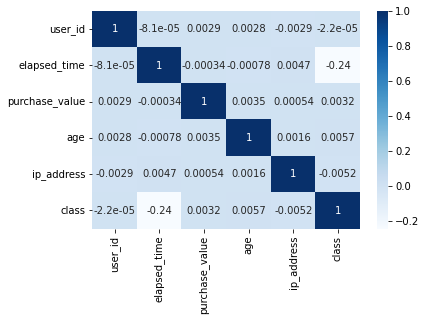

In [ ]:
# Correlation Matrix
# From the heatmap we can say that feature cloumns are independent to each other.
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

## Feature Engineering

The steps we take below are, by no means, fully comprehensive nor production-level. However, we will assume that those steps below are **sufficient** for data processing and feature engineering in this assessment. 

### Problem 0 
#### Write a custom transformer called CategoricalTransformer to encode categorical columns in an optional "columns" construction parameter.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = preprocessing.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = preprocessing.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 1
#### Write a custom transformer called DropColTransformer to drop the columns specified in an optional "columns" construction parameter.

In [ ]:
class DropColTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self,columns = None):
        self.columns = columns # array of column names to drop

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Drop columns of X specified in self.columns using drop().
        If no columns specified, return the dataset as it is.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output = output.drop(col,axis=1)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 2
#### Write a custom transformer called FillMissingTransformer that fills in the missing values in the dataset that takes an optional "value" parameter that specifies what value to substitute for missing values.

In [ ]:
class FillMissingTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self, missing_value = None):
        self.missing_value = missing_value #value to substitute for missing values.

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Fill the missing values in X specified in self.missing_value using
        fillna(). If there is no missing value then return the dataset as it is.
        '''
        output = X.copy()
        if self.missing_value is not None:
            output.fillna(self.missing_value)
        
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 3
#### Write a custom transformer called DateTransformer to cast date features into pandas datetime format that takes an optional construction parameter "columns" to specify which columns need to be transformed, and an optional parameter "strftime" that specifies the format to be parsed.

In [ ]:
class DateTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self,columns = None, format_type = None):
        self.columns = columns # array of column names to convert in datetime format.
        self.format_type = format_type  # format of the datetime, in which you wants the output, like '%m', '%d'.

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        to_datetime(). If no columns specified, return as it is.
        '''
        output = X.copy()
        if self.columns is not None:
          if self.format_type is not None:
              for col in self.columns:
                  output[col] = pd.to_datetime(output[col]).strftime(self.format_type)
          else:
              for col in self.columns:
                  output[col] = pd.to_datetime(output[col])        
        
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 4 
#### Write a custom transformer called NumericalTransformer to: <br> 1) calculate the latency (i.e. time taken by the user in completing a transaction after registration)  <br> 2) calculate the number of users who are using the same device. 
The construction method need not contain an optional parameter.

In [ ]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    ### BEGIN SOLUTION
    def __init__(self): 
      pass
         
    def fit(self,X,y=None):
        return self      # not relevant here

    def transform(self,X):
        '''
        Transforms the X, by introducing the two new columns, one is latency(sec) 
        i,e,. difference between 'purchase_timedate' and 'signup_time' and another
        is the count of users using same device. 
        '''
        output = X.copy()
        output['latency(sec)'] = (output['purchase_time'] - output['signup_time'])/np.timedelta64(1,'s')

        count_by_device = output['user_id'].groupby(output['device_id']).count()
        user_count_per_device = count_by_device[output['device_id']].reset_index(drop=True)
        user_count_per_device.name = 'user_count_per_device'
        
        output = pd.concat([output,user_count_per_device], axis = 1)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Problem 5 
#### Create a Pipeline Object that concatonates all of the custom transformers that you have just created

In [ ]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
                        ('missing', FillMissingTransformer()),
                        ('dates', DateTransformer(['signup_time', 'purchase_time'])),
                        ('numerical', NumericalTransformer()),
                        ('categorical', CategoricalTransformer(['country', 'sex', 
                                                          'browser', 'source','device_id'])),
                        ('dropCat', DropColTransformer(['signup_time', 'purchase_time']))])

In [ ]:
transformed_data = full_pipeline.fit_transform(data)

In [ ]:
X = transformed_data.drop(['class'], axis = 1)
y = transformed_data['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Modeling

Assuming this pipeline is sufficient for data processing and feature engineering, explore **how ever many** different model types and choose one model in which you'd like to move forward. Please explain why you would move forward with the best model.

**Preferably only use models from sklearn. If there is an absolute need to incorporate models from other packages, please specify which version of the package was used and explain why that package was needed.**

*Feel free to add/remove cells if needed*

In [ ]:
# First we will try to drop the "user_id" column because it is having high cardinality 
# which will effect our model and it is not much usefull in this case.

X = X.drop(['user_id'], axis = 1)

In [ ]:
# Splitting the data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Only 9.3% of the data, labeled as fraud. ( Highly imbalance data)
print(data["class"].value_counts(normalize=True))

0    0.906125
1    0.093875
Name: class, dtype: float64


**As we can see our data is highly imbalanced, So first we will try to balance  it, and then build our model. Otherwise our model becomes biased towards the
majority class prediction.**

In [ ]:
# We will try different resampling technique like under-,over-, and combine-sampling
# and use the best one for balancing our data.
'''
 Finally choose SMOTE to balance our data.
 SMOTE is used to create synthetic class samples of minority class to 
 balance the distribution.
'''

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE,  RandomOverSampler, ADASYN , KMeansSMOTE

smt = SMOTE(random_state=4)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
# Now our data is balanced.
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: class, dtype: float64

In [ ]:
# Required classes for model building and validation.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### Problem 6: Build model 1

#### Necessary steps to build the model

In [ ]:
# Logistic Regression

clf = LogisticRegression(solver='lbfgs', random_state=42 , dual=False)
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, clf_preds))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     27166
           1       0.20      0.65      0.31      2834

    accuracy                           0.73     30000
   macro avg       0.58      0.69      0.57     30000
weighted avg       0.88      0.73      0.78     30000



### Problem 7: Build model 2

In [ ]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth= 20)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     27166
           1       0.30      0.63      0.40      2834

    accuracy                           0.83     30000
   macro avg       0.63      0.74      0.65     30000
weighted avg       0.89      0.83      0.85     30000



### Problem 8: Build model 3

In [ ]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators= 50, criterion = 'entropy', max_depth= 30)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27166
           1       0.50      0.59      0.54      2834

    accuracy                           0.90     30000
   macro avg       0.73      0.76      0.74     30000
weighted avg       0.91      0.90      0.91     30000



### Build model 4

#### Necessary steps to build the model

In [ ]:
# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     27166
           1       0.25      0.62      0.35      2834

    accuracy                           0.78     30000
   macro avg       0.60      0.71      0.61     30000
weighted avg       0.89      0.78      0.82     30000



### Build model 5

#### Necessary steps to build the model

In [ ]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, gnb_preds))

              precision    recall  f1-score   support

           0       0.95      0.65      0.78     27166
           1       0.17      0.70      0.28      2834

    accuracy                           0.66     30000
   macro avg       0.56      0.68      0.53     30000
weighted avg       0.88      0.66      0.73     30000



### Build model 6

#### Necessary steps to build the model

In [ ]:
# AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,)
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, ab_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27166
           1       0.72      0.60      0.65      2834

    accuracy                           0.94     30000
   macro avg       0.84      0.79      0.81     30000
weighted avg       0.94      0.94      0.94     30000



### Build model 7

#### Necessary steps to build the model

In [ ]:
# XGBClassifier

from xgboost import XGBClassifier
gb = XGBClassifier(num_boost_rounds=2000,learning_rate=0.1,early_stopping_rounds=10)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27166
           1       0.52      0.61      0.56      2834

    accuracy                           0.91     30000
   macro avg       0.74      0.77      0.76     30000
weighted avg       0.92      0.91      0.91     30000



### Build model 8

In [ ]:
# to install Catboost library which is not the part of Sklearn, as it work fast in decision tree
# and use leaf nodes for maximizes the accuracy of split scoring.
!pip3 install catboost

     |████████████████████████████████| 76.1 MB 67 kB/s 


In [ ]:
# CatBoostClassifier
from catboost import CatBoostClassifier
cb = CatBoostClassifier(learning_rate = 0.01,iterations = 2,verbose=False)
cb.fit(X_train, y_train)
cb_preds = gb.predict(X_test)

#### Performance metrics of interest & Validation results

In [ ]:
print(classification_report(y_test, cb_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27166
           1       0.52      0.61      0.56      2834

    accuracy                           0.91     30000
   macro avg       0.74      0.77      0.76     30000
weighted avg       0.92      0.91      0.91     30000



**Compare metrics of all the above models, with Cross-Validation.**

In [ ]:
# we can cross- validate our model bases on different Score parameters like Accuracy,	Precision,	recall,	F1_Score
# but here I am using "recall_macro" because I think for fraud detection Recall is the good metrics.

models = [clf, dt, rf, knn, gnb, ab, gb, cb] 
result = pd.DataFrame([],columns=['Model','Accuracy','Precision','recall', 'F1_Score', 'CV_recall'])

def model_eval(y_test,y_pred):
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  F1_Score = f1_score(y_test,y_pred)
  return accuracy, precision, recall, F1_Score

def model_result(model, model_id, cv_unit):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, F1_Score = model_eval(y_test, y_pred)
    cv_recall = cross_val_score(model, X_train, y_train, scoring='recall_macro', cv=cv_unit)
    result.loc[model_id] = [str(model),accuracy, precision, recall, F1_Score, cv_recall.mean()]

for model_id, model in enumerate(models):
    model_result(model, model_id, cv_unit=10)
    
result 

,Model,Accuracy,Precision,recall,F1_Score,CV_recall
0,LogisticRegression(random_state=42),0.726667,0.204320,0.654199,0.311387,0.700101
1,DecisionTreeClassifier(max_depth=20),0.824467,0.297130,0.628440,0.403489,0.843262
2,"RandomForestClassifier(criterion='entropy', ma...",0.905567,0.500149,0.592096,0.542252,0.904627
3,KNeighborsClassifier(),0.784933,0.246568,0.621030,0.352988,0.832829
4,GaussianNB(),0.657100,0.173257,0.697248,0.277548,0.678150
5,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.940133,0.720476,0.598447,0.653816,0.803210
6,"XGBClassifier(early_stopping_rounds=10, num_bo...",0.910667,0.523461,0.606210,0.561805,0.848472
7,<catboost.core.CatBoostClassifier object at 0x...,0.930367,0.634915,0.618560,0.626631,0.809928


### Problem 9: Explain why you chose your model to move forward

In [ ]:
print("""
So, if we are only concerned about capturing Fraud, then recall is good; 
Otherwise, we should consider F1 score as it balances recall & precision both; 
So, it totally depends on the business use case; either recall or F1 score.

Based on the model performance, we can select the CatBoostClassifier because 
it is giving best recall score and Precision is also good compare to other model,
overall gives good F1_score.

Another reason is, it is based on tree based model, 
because in our case after label encoding, some features have high scale and some
having low. So its better to use tree based model because it is not affected by 
the feature scale.
""")


So, if we are only concerned about capturing Fraud, then recall is good; 
Otherwise, we should consider F1 score as it balances recall & precision both; 
So, it totally depends on the business use case; either recall or F1 score.

Based on the model performance, we can select the CatBoostClassifier because 
it is giving best recall score and Precision is also good compare to other model,
overall gives good F1_score.

Another reason is, it is based on tree based model, 
because in our case after label encoding, some features have high scale and some
having low. So its better to use tree based model because it is not affected by 
the feature scale.



In [ ]:
# Hyperparameter tuning  
# I have used RandomizedSearchCV because it take less time in processing when you
# didn't have GPU but we can use GridSearchCV also. 


# Here we are passing our resampling data through pipeline to avoid data leakage.


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline as imbpipeline

# Split of the test set 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=4)],
                                ['cb', CatBoostClassifier(loss_function='Logloss', 
                                                          eval_metric='f1',
                                                          early_stopping_rounds=10)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=4)
# define the parameter grid 
param_grid ={'depth'         : [2,3,4,5,6,8,9,10,],
             'learning_rate' : [0.01,0.02,0.03,0.04],
             'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
            }

# Instantiate GridSearchCV - sets up the parameters on how to run 
grid = RandomizedSearchCV(estimator=cb, param_distributions = param_grid, 
                          cv = stratified_kfold, n_jobs=-1)
# Execute the search (and retrain the final model) 
grid.fit(X_trainval, y_trainval)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")

# do a final evaluation on the test set 
print(f"test-set score: {grid.score(X_test, y_test):.3f}")

preds = grid.predict(X_test)

print(classification_report(y_test, preds))

best mean cross-validation score: 0.9557777777777778
best parameters: {'learning_rate': 0.03, 'iterations': 80, 'depth': 6}
test-set score: 0.958
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27159
           1       1.00      0.55      0.71      2841

    accuracy                           0.96     30000
   macro avg       0.98      0.78      0.85     30000
weighted avg       0.96      0.96      0.95     30000



In [ ]:
print("""
I have tried to tune our model and in this way we are able to improve overall F1-score(i.e 71% from the 62%)
but in this case aur recall is getting reduce compare to the base model.
But its depend upon the business case we have to select the metrics and try to tune it accordingly.
""")


I have tried to tune our model and in this way we are able to improve overall F1-score(i.e 71% from the 62%)
but in this case aur recall is getting reduce compare to the base model.
But its depend upon the business case we have to select the metrics and try to tune it accordingly.



### Problem 10: Next Steps
Open-ended Question: What would you do to improve this model in data processing steps, feature engineering steps, and/or modeling stage? 

In [1]:
print("""
In Data processing steps/feature engineering steps: 
-I will try to use 'Target Guided Ordinal Encoding' instead of 'Label Encoding'
because it is performing better when we have high cardinality in a columns.

- I will try to check which column is not affecting much to the dependent variable,
and drop that column for better accuracy.

-I will try to collect more data from different sources to make it as a balance dataset.

-Try to understand how the "elapsed_time" columns is related to this problem
(because the description of this column is missing in the file).

In modeling stage:
- I will try to balance the dataset by using different resampling technique in a pipeline
to save data leakage in cross-validation.
-We can try lot of things in this section, but main thing is hyperparameter tuning 
which will be the game changer for metrics purpose.
-We will build as many possible models and compare then with AUC-ROC curve, 
try to find the best thresshold value for the model. and select the model based on that.
- We can try multiple model in horizontal scale means Stacking, in this way we will boost our model
and same way we can try multiple models in the gradiant boosting to improve the weak predictions.
- And we can try different Cross-Validation method to get the best average value.
""")


In Data processing steps/feature engineering steps: 
-I will try to use 'Target Guided Ordinal Encoding' instead of 'Label Encoding'
because it is performing better when we have high cardinality in a columns.

- I will try to check which column is not affecting much to the dependent variable,
and drop that column for better accuracy.

-I will try to collect more data from different sources to make it as a balance dataset.

-Try to understand how the "elapsed_time" columns is related to this problem
(because the description of this column is missing in the file).

In modeling stage:
- I will try to balance the dataset by using different resampling technique in a pipeline
to save data leakage in cross-validation.
-We can try lot of things in this section, but main thing is hyperparameter tuning 
which will be the game changer for metrics purpose.
-We will build as many possible models and compare then with AUC-ROC curve, 
try to find the best thresshold value for the model. and select t